# Vectorized operations in pandas

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame({'a': [1,2,3], 'b':np.random.uniform(size=3)})
df

,a,b
0,1,0.088895
1,2,0.201691
2,3,0.549672


In [25]:
df.a.mul(2).add(5).astype(str).values

array(['7', '9', '11'], dtype=object)

In [27]:
(df.a*2 + 5).astype(str).values
# Same result but looks much more sane

array(['7', '9', '11'], dtype=object)

# Comparison of several ways to calculate a new column

In [14]:
# Create a large fake dataset
df = pd.DataFrame({'x': np.random.uniform(size=1000000), 'y': np.random.normal(size=1000000)})
df.head()

,x,y
0,0.034755,-1.633352
1,0.728487,0.528063
2,0.905760,-2.608346
3,0.741198,1.187009
4,0.985139,1.914810


In [3]:
def collect(label, time, d):
    # Some half-reasonable way to track execution time
    print(label, ':', time)
    d[label] = time
    return d

In [4]:
n = 100
rec = {}

tic = time.time()
for i in range(n):
    d = df.copy()
copytime = time.time()-tic
rec = collect("Basic copying", copytime, rec)

tic = time.time()
for i in range(n):
    d = d.copy()
    d['z'] = d.x-d.y
rec = collect("d['z'] = d.x-d.y", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.loc[:,'z'] = d.x-d.y
rec = collect("d.loc[:,'z'] = d.x-d.y", time.time()-tic-copytime, rec)


tic = time.time()
for i in range(n):
    d = df.copy()
    d = d.assign(z=d.x-d.y)
rec = collect("d = d.assign(z=d.x-d.y)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.insert(2, 'z', d.x-d.y)
rec = collect("d.insert(2, 'z', d.x-d.y)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.eval('z=x-y', inplace=True)
rec = collect("d.eval('z=x-y', inplace=True)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d = d.eval('z=x-y', inplace=False)
rec = collect("d = d.eval('z=x-y', inplace=False)", time.time()-tic-copytime, rec)

Basic copying : 0.5523428916931152
d['z'] = d.x-d.y : 1.118281602859497
d.loc[:,'z'] = d.x-d.y : 2.752394437789917
d = d.assign(z=d.x-d.y) : 1.254723072052002
d.insert(2, 'z', d.x-d.y) : 0.7354273796081543
d.eval('z=x-y', inplace=True) : 1.7870275974273682
d = d.eval('z=x-y', inplace=False) : 2.335803270339966


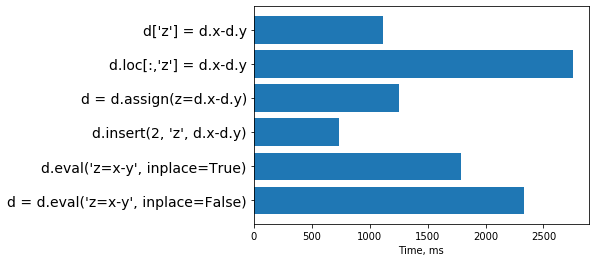

In [5]:
x,y = zip(*[(key,val) for key,val in rec.items()][1:])
_,ax = plt.subplots()
plt.barh(x, np.array(y)*1000);
plt.xlabel('Time, ms');
plt.yticks(fontsize=14)
ax.invert_yaxis();